In [19]:
# importing libraries


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [30]:
# loading and basic data cleaning

df = pd.read_csv('C:/Users/User/Downloads/loan_approval_dataset.csv')

In [31]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [32]:
df.shape

(4269, 13)

In [42]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_statuss_numeric
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,0.0
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,NaN


In [37]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [51]:
df['loan_status_numeric'] = df['loan_status'].map({' Approved': 1, ' Rejected': 0})
df['education_numeric'] = df['education'].map({' Graduate': 1, ' Not Graduate': 0})
df['self_employed_numeric'] = df['self_employed'].map({' Yes': 1, ' No': 0})


In [52]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_statuss_numeric,loan_status_numeric,education_numeric,self_employed_numeric
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,1,1,1,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0,0,0,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0,0,1,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0,0,1,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0,0,0,1


In [46]:
df['loan_status'].head()

0     Approved
1     Rejected
2     Rejected
3     Rejected
4     Rejected
Name: loan_status, dtype: object

In [62]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_statuss_numeric,loan_status_numeric,education_numeric,self_employed_numeric
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000,4269.000000
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160,0.622160,0.502225,0.503631
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904,0.484904,0.500054,0.500045
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000,0.000000,0.000000,0.000000
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000,1.000000,1.000000,1.000000
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000,1.000000,1.000000,1.000000
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000,1.000000,1.000000,1.000000


In [7]:
df = df.dropna()

In [63]:
df.shape

(4269, 17)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
 13  loan_statuss_numeric      4269 non-null   int64 
 14  loan_status_numeric     

## EDA

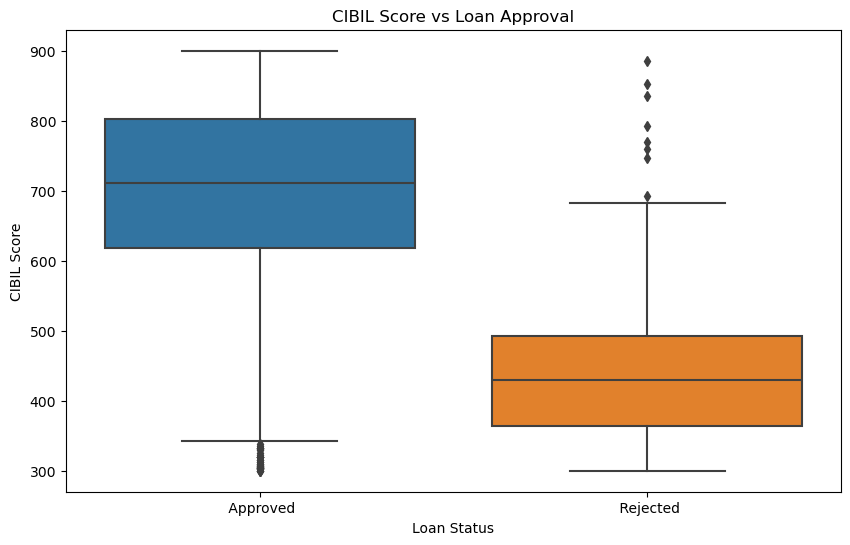

In [43]:
# relationship between cibil score and loan approval
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=df)

# Add titles and labels
plt.title('CIBIL Score vs Loan Approval')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')

# Show the plot
plt.show()

### There is clear sign that higher the cibil score means higher chance of loan approval and viceversa. Some outliers are there that loan is rejected with even wth high cibil score and loan approved with lower cibi score.

##

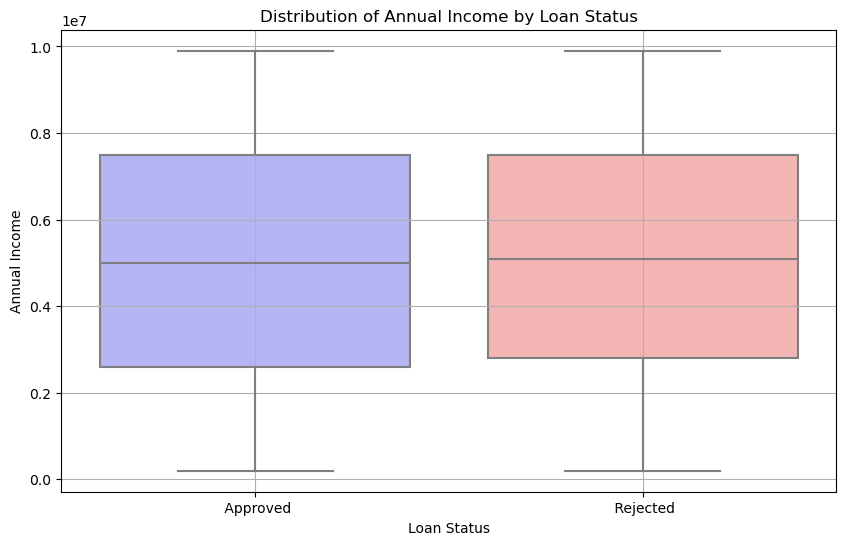

In [60]:
# relationship between annual income and loan approval

plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='income_annum', data=df, palette='bwr')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Distribution of Annual Income by Loan Status')
plt.grid(True)
plt.show()

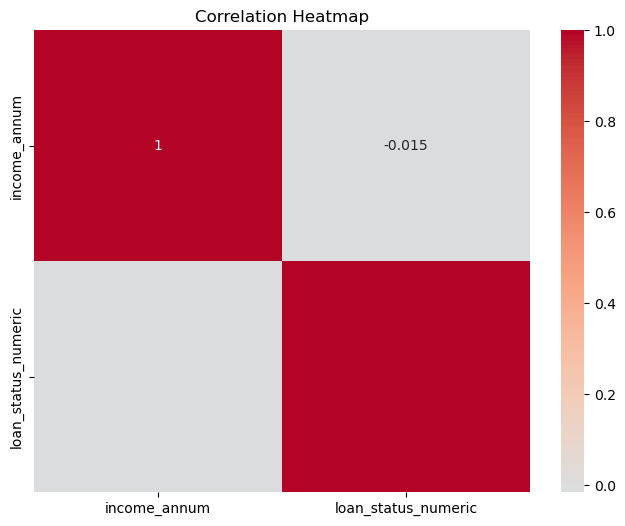

In [61]:
# Create a correlation matrix
corr_matrix = df[['income_annum', 'loan_status_numeric']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### There is no much relationship between annual income and loan approval

## ML Models

In [77]:
# importing libaries

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
 13  loan_statuss_numeric      4269 non-null   int64 
 14  loan_status_numeric     

In [69]:
# Dropping columns

columns_to_drop = ['loan_statuss_numeric','loan_status_numeric','education_numeric','self_employed_numeric']

df = df.drop(columns=columns_to_drop)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## ML Models

## without outliers

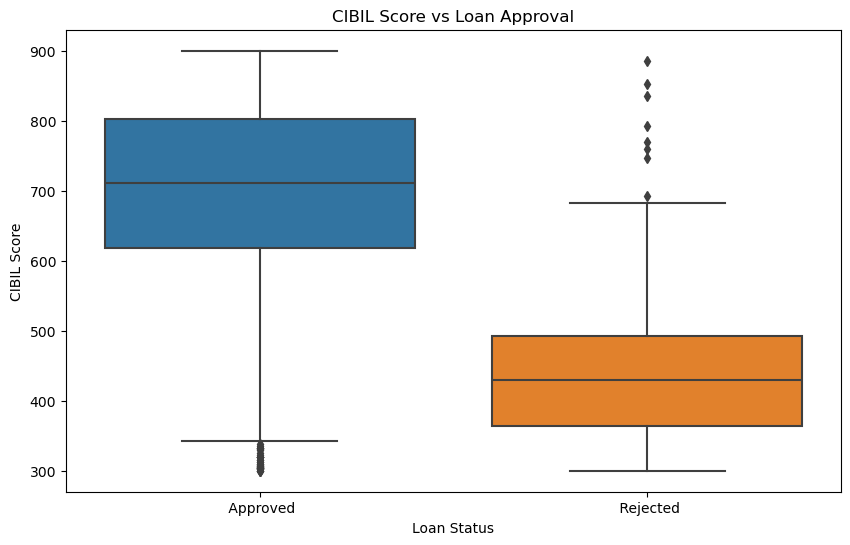

In [88]:
# finding the outliers

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=df)

# Add titles and labels
plt.title('CIBIL Score vs Loan Approval')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')

# Show the plot
plt.show()

In [98]:
# Removing the outliers


# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'cibil_score' grouped by 'loan_status'
Q1 = df.groupby('loan_status')['cibil_score'].quantile(0.25)
Q3 = df.groupby('loan_status')['cibil_score'].quantile(0.75)

# Calculate IQR (Interquartile Range) for 'cibil_score' grouped by 'loan_status'
IQR = Q3 - Q1

# Define lower and upper bounds for outliers for 'cibil_score' based on 'loan_status'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'cibil_score' is below the lower bound for 'Approved' loans
df_cleaned = df[~((df['loan_status'] == ' Approved') & (df['cibil_score'] < lower_bound[' Approved']))]

# Filter out rows where 'cibil_score' is above the upper bound for 'Rejected' loans
df_cleaned = df_cleaned[~((df_cleaned['loan_status'] == ' Rejected') & (df_cleaned['cibil_score'] > upper_bound[' Rejected']))]

print(df.shape)
print(df_cleaned.shape)

(4269, 16)
(4227, 16)


In [107]:
# Encoding categorical variables
df_cleaned['education_numeric'] = LabelEncoder().fit_transform(df_cleaned['education'])
df_cleaned['self_employed_numeric'] = LabelEncoder().fit_transform(df_cleaned['self_employed'])
df_cleaned['loan_status_numeric'] = LabelEncoder().fit_transform(df_cleaned['loan_status'])

In [108]:
# Feature Selection
features = [
    'no_of_dependents', 'education_numeric', 'self_employed_numeric', 'income_annum',
    'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'
]
X = df_cleaned[features]
y = df_cleaned['loan_status_numeric']

In [113]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3381, 11)
Testing set shape: (846, 11)


In [114]:
# Model fitting - Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9787234042553191


In [115]:
# Model fitting - LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7293144208037825


In [116]:
# Model fitting - Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975177304964539


In [118]:
# Model fitting - SVM
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6122931442080378


In [120]:
# Model fitting - KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.566193853427896


### model valuation using K fold

In [109]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

In [110]:
# Evaluate models using cross validation - k fold cv
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=5, scoring=make_scorer(accuracy_score))
    results[name] = cv_results

In [133]:
# accuracy per fold

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results)

# Transpose the DataFrame for better readability
results_transposed = results_df.T
#results_transposed *= 100

# Rename the columns
results_transposed.columns = [f"Fold {i+1}" for i in range(5)]

# Display the transposed DataFrame
print(results_transposed)

                       Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Random Forest        0.982436  0.976581  0.983607  0.978923  0.983587
Logistic Regression  0.743560  0.715457  0.734192  0.735363  0.723329
Decision Tree        0.973068  0.978923  0.980094  0.964871  0.975381
SVM                  0.622951  0.621780  0.621780  0.621780  0.622509
KNN                  0.555035  0.553864  0.564403  0.555035  0.582649


In [112]:
# Display results
for name, scores in results.items():
    print(f"{name}: Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")

Random Forest: Mean Accuracy: 0.9815, Standard Deviation: 0.0023
Logistic Regression: Mean Accuracy: 0.7346, Standard Deviation: 0.0120
Decision Tree: Mean Accuracy: 0.9804, Standard Deviation: 0.0033
SVM: Mean Accuracy: 0.6203, Standard Deviation: 0.0002
KNN: Mean Accuracy: 0.5612, Standard Deviation: 0.0097


## with outliers

In [149]:
df = pd.read_csv('C:/Users/User/Downloads/loan_approval_dataset.csv')

In [150]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [151]:
df.dropna()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [156]:
df.columns = df.columns.str.strip()

In [158]:
df.shape

(4269, 16)

In [159]:
# Encoding categorical variables
df['education_numeric'] = LabelEncoder().fit_transform(df['education'])
df['self_employed_numeric'] = LabelEncoder().fit_transform(df['self_employed'])
df['loan_status_numeric'] = LabelEncoder().fit_transform(df['loan_status'])

In [160]:
# Feature Selection
features = [
    'no_of_dependents', 'education_numeric', 'self_employed_numeric', 'income_annum',
    'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'
]
X = df[features]
y = df['loan_status_numeric']

In [161]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (3415, 11)
Testing set shape: (854, 11)


In [162]:
# Model fitting - Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.977751756440281


In [163]:
# Model fitting - LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7295081967213115


In [164]:
# Model fitting - Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.977751756440281


In [165]:
# Model fitting - SVM
model = SVC(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


In [166]:
# Model fitting - KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5784543325526932


### model valuation using K fold

In [167]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

In [168]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_numeric,self_employed_numeric,loan_status_numeric
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,0,0,0
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,1,1,1
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,0,0,1
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,0,0,1
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,1,1,1


In [169]:
# Evaluate models using cross validation - k fold cv
X = df[features]
y = df['loan_status_numeric']
results2 = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=5, scoring=make_scorer(accuracy_score))
    results2[name] = cv_results

In [171]:
# accuracy per fold

# Convert results dictionary to DataFrame
results_df2 = pd.DataFrame(results2)

# Transpose the DataFrame for better readability
results_transposed2 = results_df2.T
#results_transposed *= 100

# Rename the columns
results_transposed2.columns = [f"Fold {i+1}" for i in range(5)]

# Display the transposed DataFrame
print(results_transposed2)

                       Fold 1    Fold 2    Fold 3    Fold 4    Fold 5
Random Forest        0.982436  0.976581  0.983607  0.978923  0.983587
Logistic Regression  0.743560  0.715457  0.734192  0.735363  0.723329
Decision Tree        0.973068  0.978923  0.980094  0.964871  0.975381
SVM                  0.622951  0.621780  0.621780  0.621780  0.622509
KNN                  0.555035  0.553864  0.564403  0.555035  0.582649


In [172]:
# Display results
for name, scores in results2.items():
    print(f"{name}: Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")

Random Forest: Mean Accuracy: 0.9810, Standard Deviation: 0.0028
Logistic Regression: Mean Accuracy: 0.7304, Standard Deviation: 0.0099
Decision Tree: Mean Accuracy: 0.9745, Standard Deviation: 0.0054
SVM: Mean Accuracy: 0.6222, Standard Deviation: 0.0005
KNN: Mean Accuracy: 0.5622, Standard Deviation: 0.0109


In [146]:

# dictionary with model names and sensitivity levels
data = {
    'Model': ['Random Forest', 'SVM', 'KNN', 'Decision Tree', 'Logistic Regression'],
    'Sensitivity to Outliers': ['Less sensitive', 'Less sensitive', 'Less sensitive', 'Moderate sensitivity', 'Moderate sensitivity']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                 Model Sensitivity to Outliers
0        Random Forest          Less sensitive
1                  SVM          Less sensitive
2                  KNN          Less sensitive
3        Decision Tree    Moderate sensitivity
4  Logistic Regression    Moderate sensitivity


***The accuracy of a model is the almost same with and without outliers in a k-fold evaluation and 
    usual train test split with same random state, 
    it could be due to several reasons:***

1. **Outliers are not influential:** 
    The outliers in your dataset may not be influential enough to significantly 
    impact the model's performance. This could happen if the outliers are sparse 
    or if the model is inherently robust to outliers.

2. **Model is robust:** 
    The model you are using might be robust to outliers. 
    Models like Random Forest, SVM, and KNN are generally 
    less sensitive to outliers compared to linear models like Logistic Regression.

3. **Data distribution:** 
    The distribution of outliers in your dataset may not affect the 
    cross-validation splits significantly, leading to similar performance with and without outliers.

4. **Other factors:** 
    There could be other factors at play, such as the specific 
    dataset and the preprocessing steps applied before model training.

